In [1]:
import sys
import time
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import savgol_filter
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

In [2]:
train_acc1 = pd.read_csv("Tensorboard_Data/run-IEEE30-MainModelsTest-model1-100Epochs-1573593761-tag-epoch_acc.csv")
train_acc2 = pd.read_csv("Tensorboard_Data/run-IEEE30-MainModelsTest-model7-100Epochs-1573601809-tag-epoch_acc.csv")

val_acc1 = pd.read_csv("Tensorboard_Data/run-IEEE30-MainModelsTest-model1-100Epochs-1573593761-tag-epoch_val_acc.csv")
val_acc2 = pd.read_csv("Tensorboard_Data/run-IEEE30-MainModelsTest-model7-100Epochs-1573601809-tag-epoch_val_acc.csv")

train_loss1 = pd.read_csv("Tensorboard_Data/run-IEEE30-MainModelsTest-model1-100Epochs-1573593761-tag-epoch_loss.csv")
train_loss2 = pd.read_csv("Tensorboard_Data/run-IEEE30-MainModelsTest-model7-100Epochs-1573601809-tag-epoch_loss.csv")

val_loss1 = pd.read_csv("Tensorboard_Data/run-IEEE30-MainModelsTest-model1-100Epochs-1573593761-tag-epoch_val_loss.csv")
val_loss2 = pd.read_csv("Tensorboard_Data/run-IEEE30-MainModelsTest-model7-100Epochs-1573601809-tag-epoch_val_loss.csv")


In [3]:
train_acc1.head()

,Wall time,Step,Value
0,1.573594e+09,0,0.499851
1,1.573594e+09,1,0.535343
2,1.573594e+09,2,0.562030
3,1.573594e+09,3,0.569313
4,1.573594e+09,4,0.573090


In [4]:
#DO THIS FOR THE EARLY STOPPING
time1 = train_acc1.iloc[0,0]
time2 = train_acc1.iloc[-1,0]
otherModeltime = time2 - time1

time1 = train_acc2.iloc[0,0]
time2 = train_acc2.iloc[9,0]
DGNNtime = time2 - time1

print("DGNN - OUR PROPOSED MODEL ", DGNNtime)
print("Other model", otherModeltime)

DGNN - OUR PROPOSED MODEL  168.1354217529297
Other model 900.5984954833984


In [5]:
tacc1 = train_acc1.iloc[:,2].to_numpy()
tacc2 = train_acc2.iloc[:,2].to_numpy()
vacc1 = val_acc1.iloc[:,2].to_numpy()
vacc2 = val_acc2.iloc[:,2].to_numpy()
epochs = range(100)

In [6]:
SMALL_SIZE = 20
MEDIUM_SIZE = 30
BIGGER_SIZE = 42

plt.rc('lines', linewidth=3 )
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', linewidth=5 )
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=26)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
title_font = {'fontname':'Arial', 'size':'36', 'color':'black', 'weight':'bold',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space
title_font2 = {'fontname':'Arial', 'size':'30', 'color':'black', 'weight':'medium',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space

## Plotting Accuracy

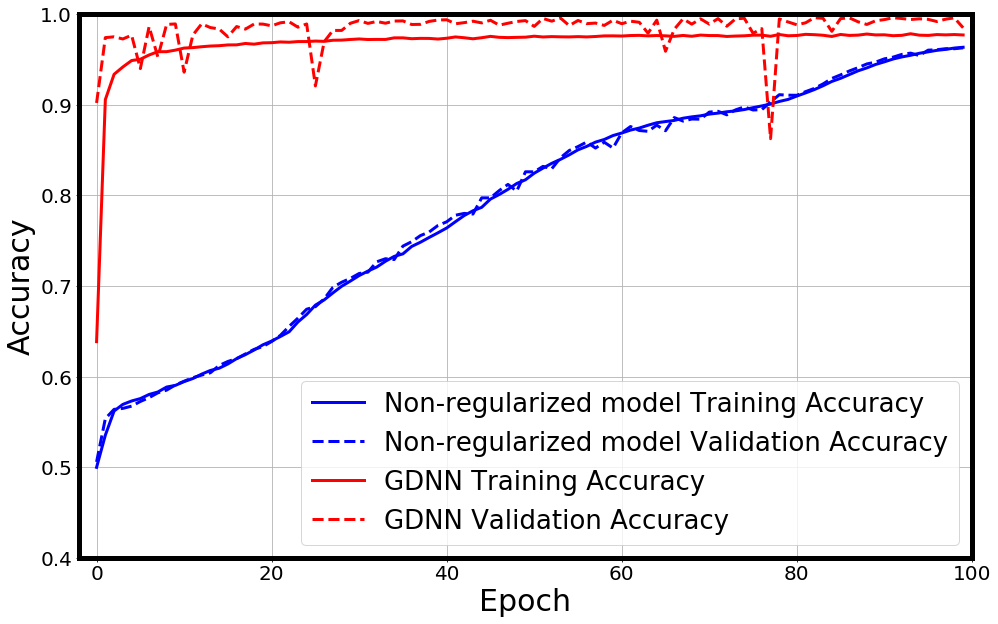

In [7]:
plt.figure(figsize=(16,10))
plt.plot(epochs,tacc1, 'b-', label="Non-regularized model Training Accuracy")
plt.plot(epochs,vacc1, 'b--', label="Non-regularized model Validation Accuracy")
plt.plot(epochs,tacc2, 'r-', label="GDNN Training Accuracy")
plt.plot(epochs,vacc2,'r--', label="GDNN Validation Accuracy")
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
# plt.title('Accuracy of Deep Learning Models', **title_font)
plt.axis([-2,100,0.4,1])
plt.grid()

plt.savefig('IEEE30_history_accuracies.png')
plt.show()

## Plotting Loss

In [8]:
tloss1 = train_loss1.iloc[:,2].to_numpy()
tloss2 = train_loss2.iloc[:,2].to_numpy()

vloss1 = val_loss1.iloc[:,2].to_numpy()
vloss2 = val_loss2.iloc[:,2].to_numpy()


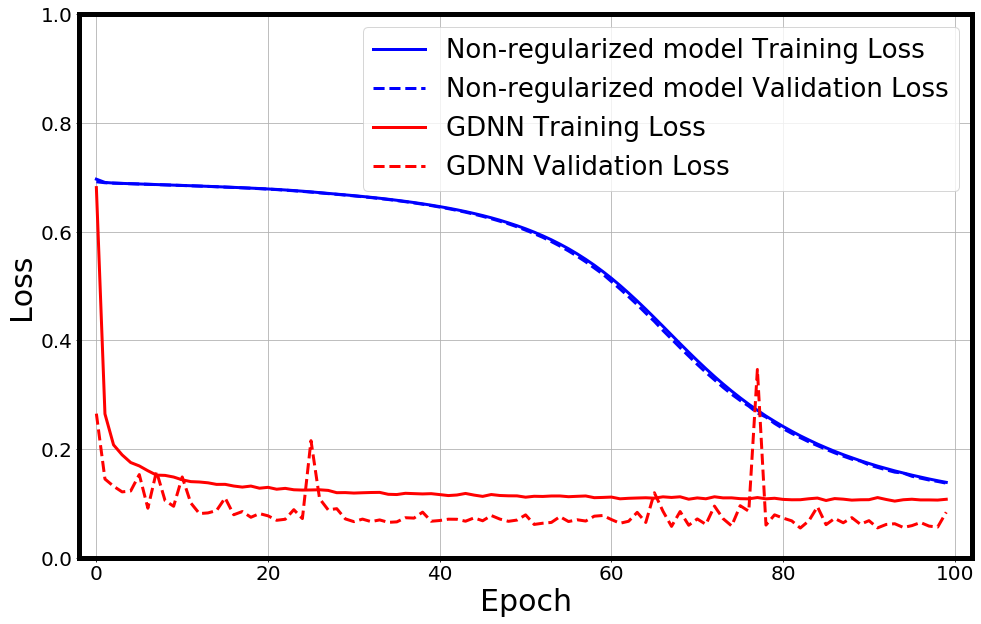

In [9]:
plt.figure(figsize=(16,10))
plt.plot(epochs,tloss1, 'b-', label="Non-regularized model Training Loss")
plt.plot(epochs,vloss1, 'b--', label="Non-regularized model Validation Loss")
plt.plot(epochs,tloss2, 'r-', label="GDNN Training Loss")
plt.plot(epochs,vloss2,'r--', label="GDNN Validation Loss")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
# plt.title('Loss of Deep Learning Models', **title_font)
plt.axis([-2,102,0,1])
plt.grid()

plt.savefig('IEEE30_history_loss.png')
plt.show()